<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/kdd99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score




In [ ]:
# Load dataset
df = pd.read_csv("/content/kdd99.csv")

In [ ]:
# Preprocess dataset
# Convert categorical features into numerical ones using label encoding
le = LabelEncoder()
df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["service"] = le.fit_transform(df["service"])
df["flag"] = le.fit_transform(df["flag"])
df["label"] = le.fit_transform(df["label"])


In [ ]:
# Select the numerical features
X = df.drop("label", axis=1)

# Perform k-means with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(X)

# Assign the cluster labels to the data
df["cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


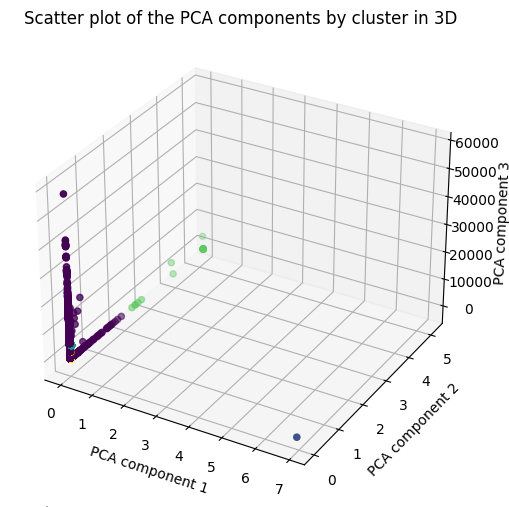

In [ ]:
# Perform PCA on the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Add the PCA components and the cluster labels to the data
df["pca1"] = X_pca[:,0]
df["pca2"] = X_pca[:,1]
df["pca3"] = X_pca[:,2]

# Plot the scatter plot of the PCA components by cluster in 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["pca1"], df["pca2"], df["pca3"], c=df["cluster"])
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
ax.set_zlabel("PCA component 3")
ax.set_title("Scatter plot of the PCA components by cluster in 3D")
plt.show()

In [ ]:
sil_score = silhouette_score(X, labels)

NameError: ignored